## Credit Card Default Prediction

#### Life Cycle of Machine learning Project

* Understanding the Problem Statement

* Data Collection

* Data Checks to perform

* Exploratory data analysis

* Data Pre-Processing

* Model Training

* Choose best model

#### 1) Problem Statement
* This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.
* Dataset Source - https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset

Content

There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)

### 2.1 Import Data and Required Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [3]:
train_data = pd.read_csv("data\credit_card_dataset_train.csv")

Show Top 5 Records

In [4]:
train_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,170000,2,2,1,52,0,0,0,0,0,...,163652,131396,130402,7620,6200,10000,5100,5500,5000,1
1,150000,2,2,1,39,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
2,120000,1,2,1,40,0,0,0,0,0,...,39510,40873,42082,2000,2000,2000,2000,2000,3000,0
3,270000,2,1,2,28,-1,-1,-1,-1,0,...,7931,3412,1035,845,9896,7977,17,1040,1848,0
4,50000,2,2,1,31,0,0,0,0,0,...,30929,30078,29170,1974,4406,1061,1073,1046,1047,1


Shape of the dataset

In [5]:
train_data.shape

(27000, 24)

#### 3. Data Checks to perform

3.1 Check Missing values

In [6]:
train_data.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

There are no missing values in the data set

3.2 Check Duplicates

In [16]:
train_data.duplicated().sum()

26

There are 26 duplicate values

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   27000 non-null  int64
 1   SEX                         27000 non-null  int64
 2   EDUCATION                   27000 non-null  int64
 3   MARRIAGE                    27000 non-null  int64
 4   AGE                         27000 non-null  int64
 5   PAY_0                       27000 non-null  int64
 6   PAY_2                       27000 non-null  int64
 7   PAY_3                       27000 non-null  int64
 8   PAY_4                       27000 non-null  int64
 9   PAY_5                       27000 non-null  int64
 10  PAY_6                       27000 non-null  int64
 11  BILL_AMT1                   27000 non-null  int64
 12  BILL_AMT2                   27000 non-null  int64
 13  BILL_AMT3                   27000 non-null  int64
 14  BILL_A

3.4 Checking the number of unique values of each column

In [17]:
train_data.nunique()

LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     20746
BILL_AMT2                     20399
BILL_AMT3                     20111
BILL_AMT4                     19718
BILL_AMT5                     19188
BILL_AMT6                     18845
PAY_AMT1                       7416
PAY_AMT2                       7390
PAY_AMT3                       7053
PAY_AMT4                       6518
PAY_AMT5                       6463
PAY_AMT6                       6512
default payment next month        2
dtype: int64

3.5 Check statistics of data set

In [18]:
train_data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.00000,...,27000.000000,27000.000000,27000.000000,27000.000000,2.700000e+04,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000
mean,167275.914074,1.604889,1.855037,1.550481,35.508815,-0.017481,-0.132704,-0.166593,-0.220815,-0.26637,...,43265.250481,40311.888259,38889.854259,5650.558852,5.848355e+03,5244.780963,4812.033852,4821.128370,5213.826963,0.221185
std,129681.969249,0.488884,0.791184,0.521588,9.247541,1.120069,1.194260,1.192944,1.165283,1.13025,...,64199.428442,60729.454753,59459.559705,16782.948110,2.232657e+04,17565.647674,15695.866874,15400.123597,17643.838191,0.415053
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.00000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,...,2350.750000,1786.000000,1261.000000,1000.000000,8.360000e+02,396.000000,291.000000,266.000000,122.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,19109.000000,18125.500000,17135.000000,2101.500000,2.009000e+03,1807.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,54656.750000,50333.250000,49327.000000,5005.000000,5.000000e+03,4552.250000,4008.000000,4031.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.00000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


3.6 Check Data Imbalance

In [19]:
train_data['default payment next month'].value_counts()

0    21028
1     5972
Name: default payment next month, dtype: int64

Observation

We can clearly see that the dataset is clearly imbalanced with class 0(people not defaulting) is the majority class

3.7 Plot a pair plot so as to see any realtion between variables

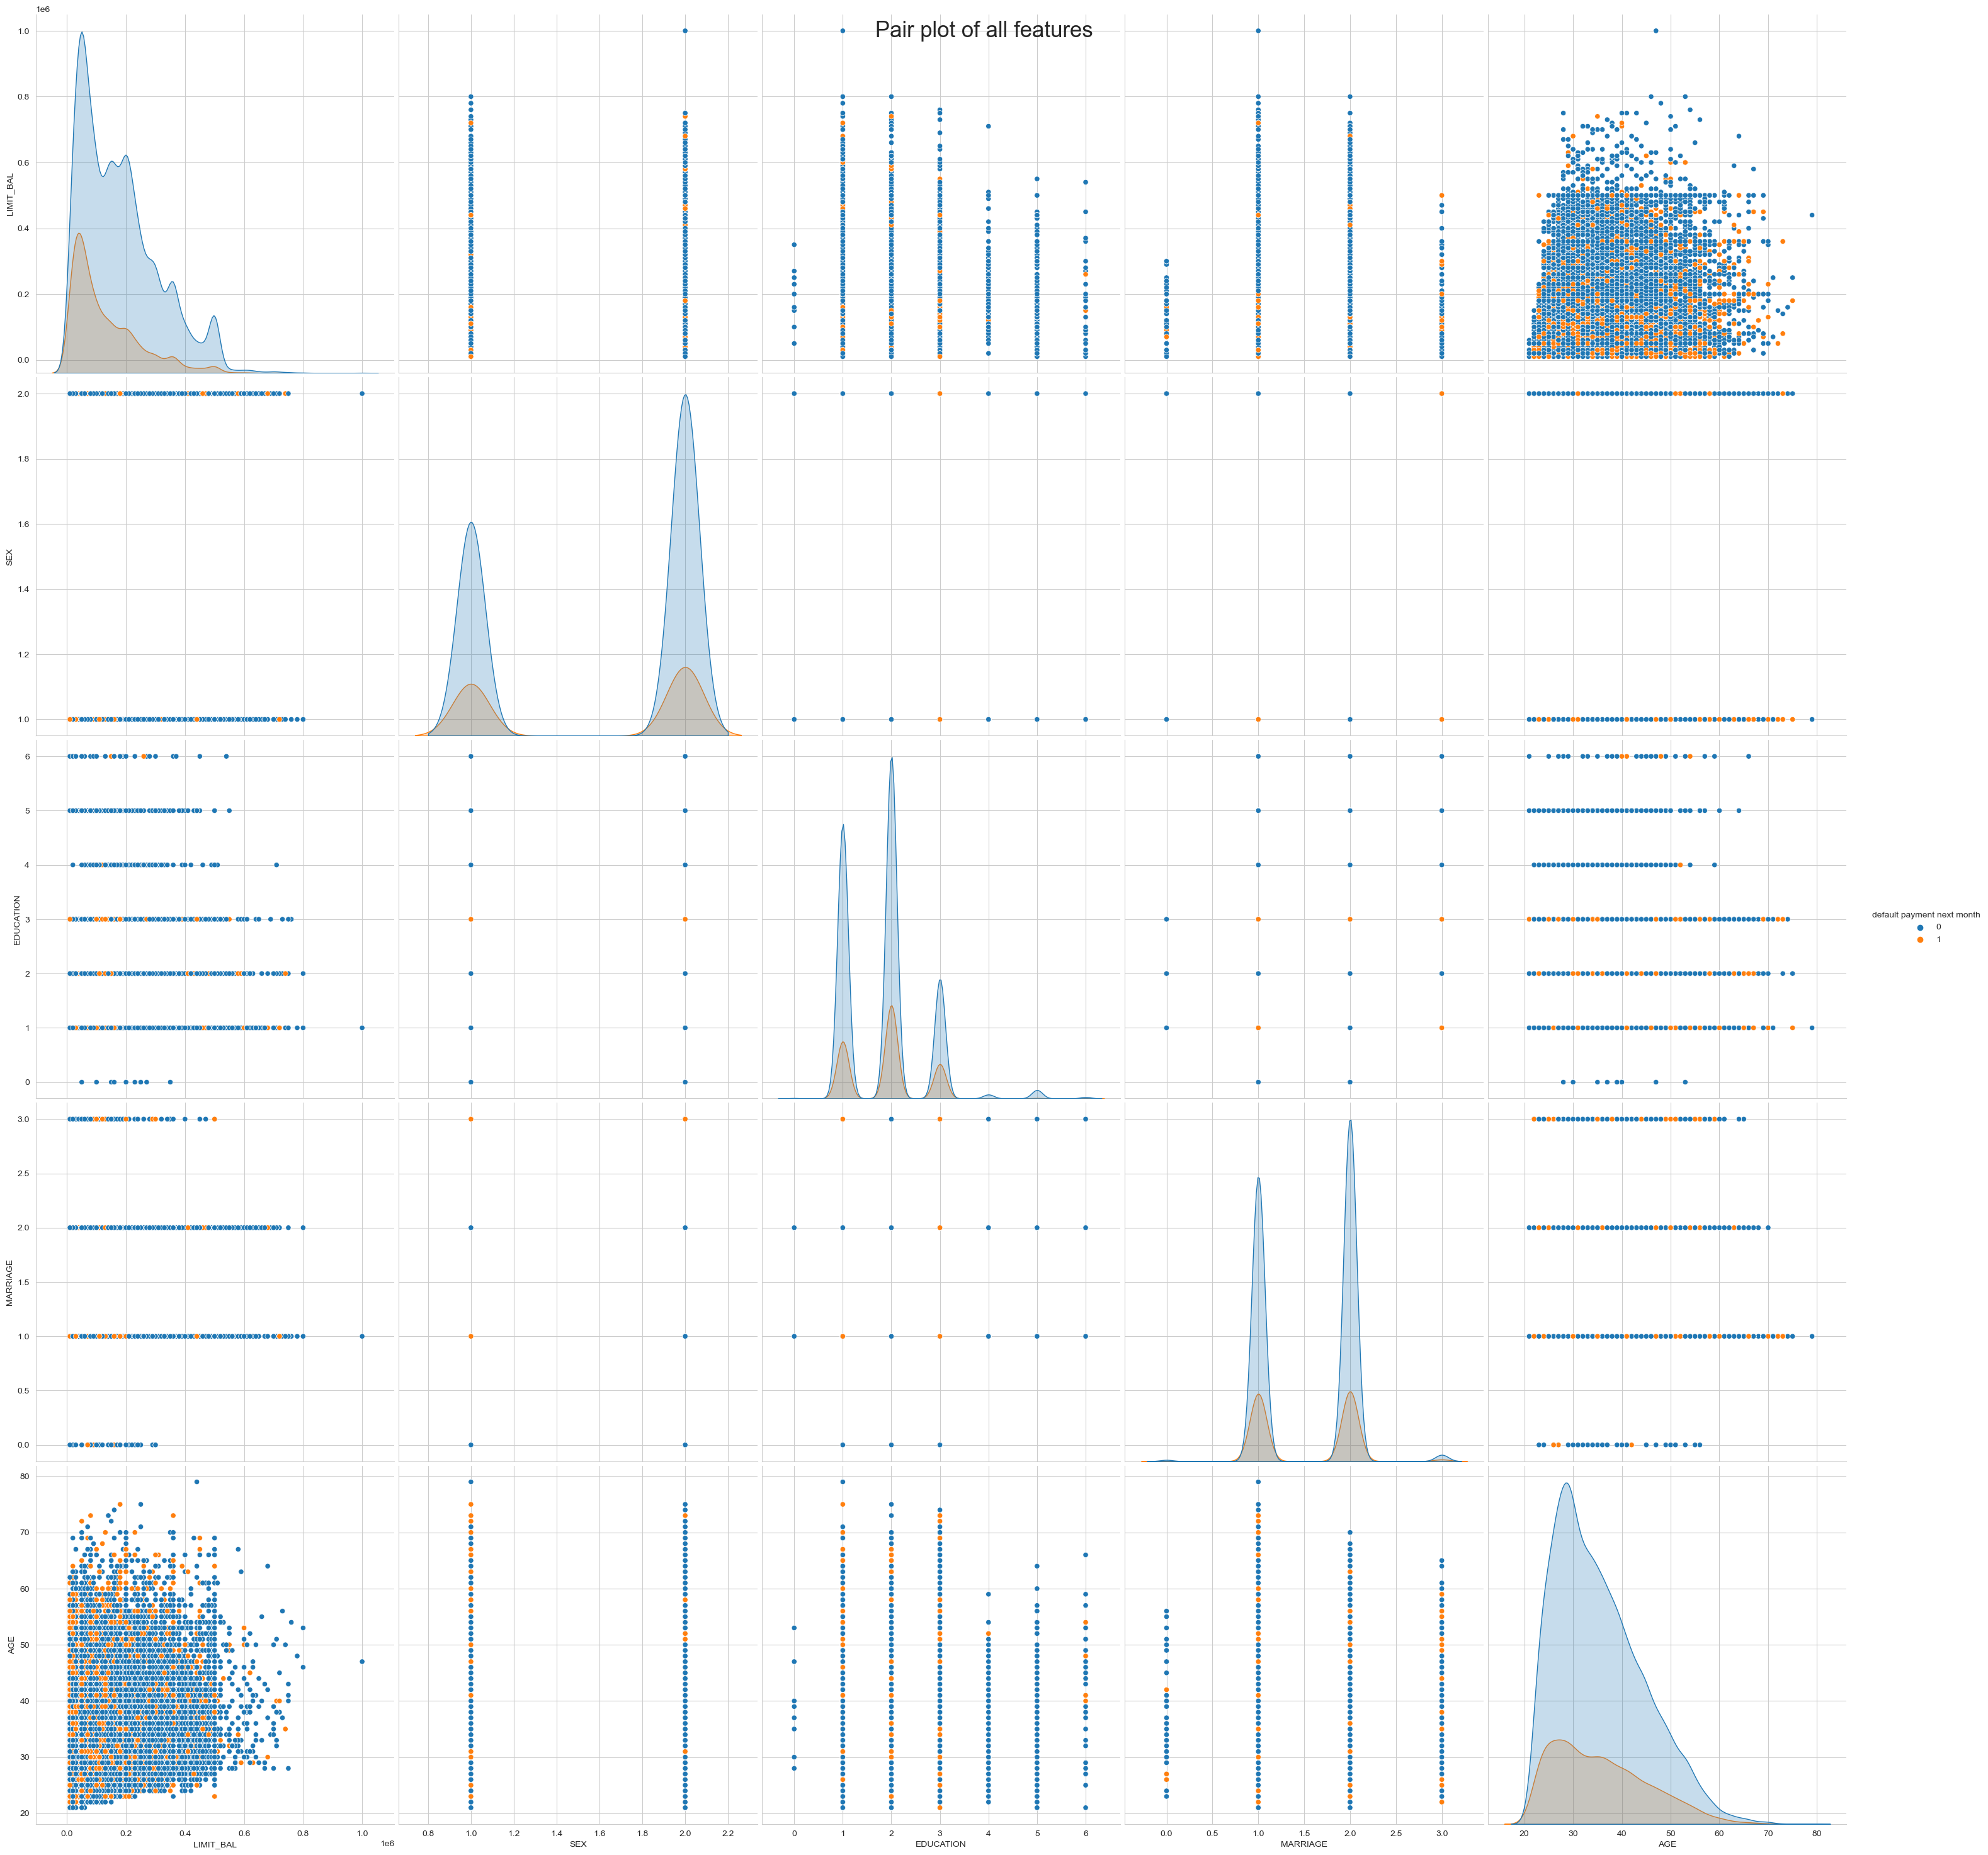

In [20]:
plt.close()
sns.set_style('whitegrid')
z = sns.pairplot(train_data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
                             'default payment next month']], hue='default payment next month', height=6)
z.fig.suptitle('Pair plot of all features', fontsize=25)
plt.show()

Lets check out more important plots from the above pair plots

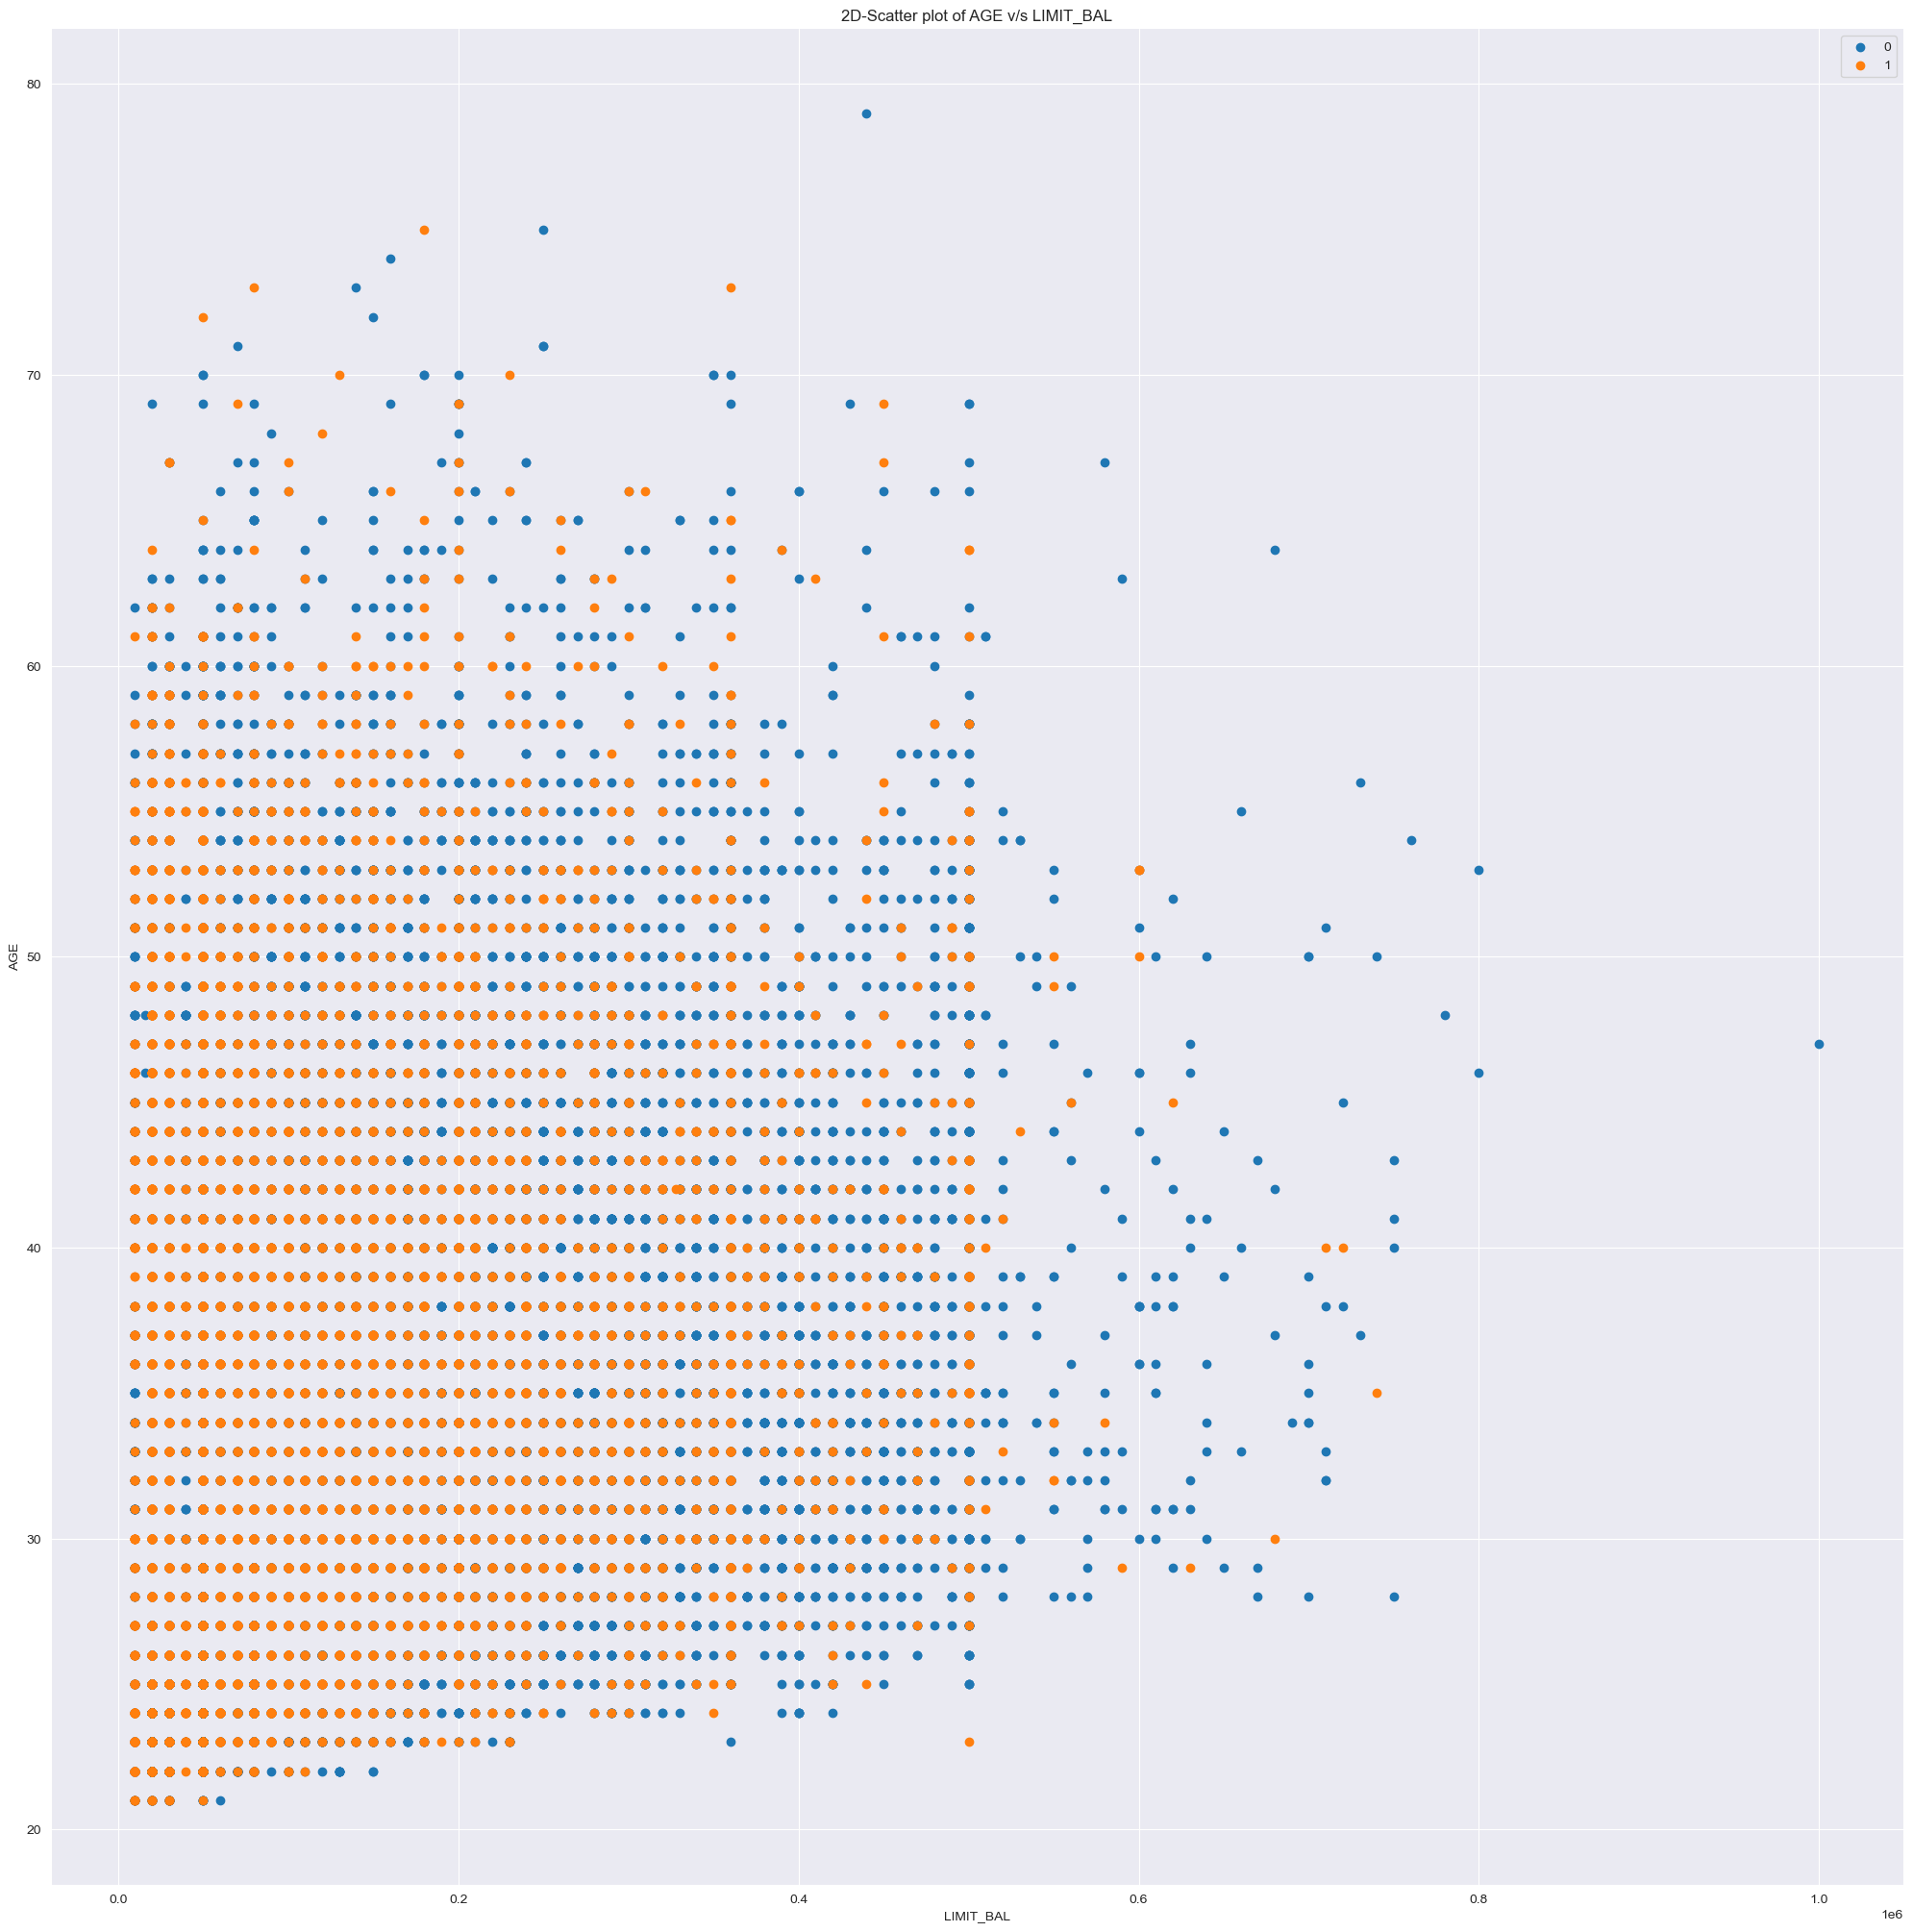

In [21]:
sns.set_style('darkgrid')
sns.FacetGrid(train_data, hue='default payment next month', height=20, aspect = 1) \
    .map(plt.scatter,'LIMIT_BAL','AGE')

plt.ylabel('AGE')
plt.xlabel('LIMIT_BAL')
plt.legend()
plt.title('2D-Scatter plot of AGE v/s LIMIT_BAL')
plt.show()

Observation

From the above plot we can see that people having higher amount of credit are defaulting less.

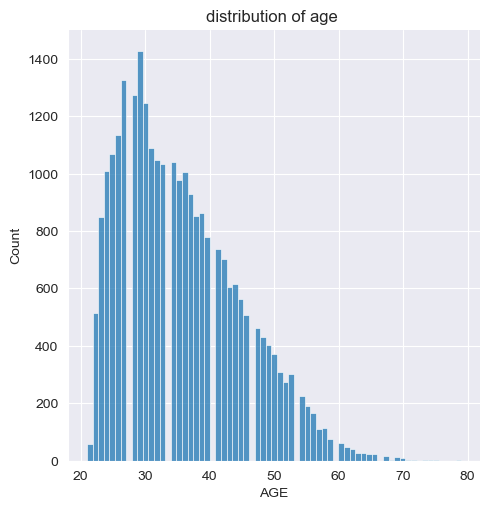

In [22]:
sns.displot(train_data['AGE'])
plt.title('distribution of age ')
plt.show()

Observation 

We can see that most people are in late 20's and 30's

In [23]:
# get the number of target values where col1 has the value 'A'
num_targets = train_data.loc[train_data['SEX'] == 1, 'default payment next month'].value_counts()
num_targets

0    8097
1    2571
Name: default payment next month, dtype: int64

Ratio of 1/0 = 2571/8097 = 0.3175

In [24]:
# get the number of target values where col1 has the value 'A'
num_targets = train_data.loc[train_data['SEX'] == 2, 'default payment next month'].value_counts()
num_targets

0    12931
1     3401
Name: default payment next month, dtype: int64

Ratio of 1/0 = 3401/12931 = 0.263

Observations

1) Firstly we can see that for the feature Education, the values (0,5 and 6) have not much relation with 1,2 and 3. Hence we need to convert these values others category(values).

2) Then we can see from the ratios that females have a less percentage of defaults as compared to males

Replacing 0 of marriage with 3(others)

3.8 Outlier Checking 

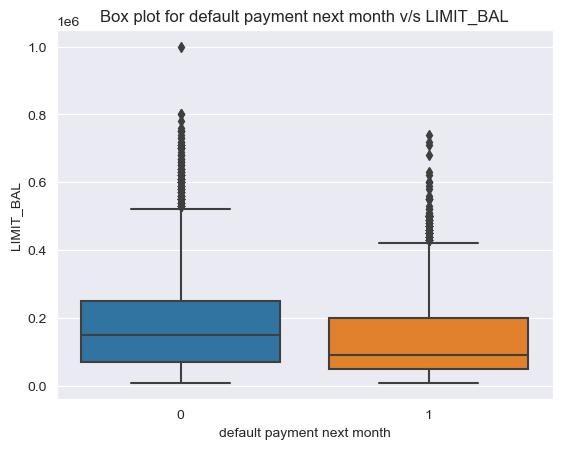

In [25]:
sns.boxplot(x='default payment next month', y='LIMIT_BAL', data=train_data)
plt.ylabel('LIMIT_BAL')
plt.xlabel('default payment next month')
plt.title("Box plot for default payment next month v/s LIMIT_BAL")
plt.show()

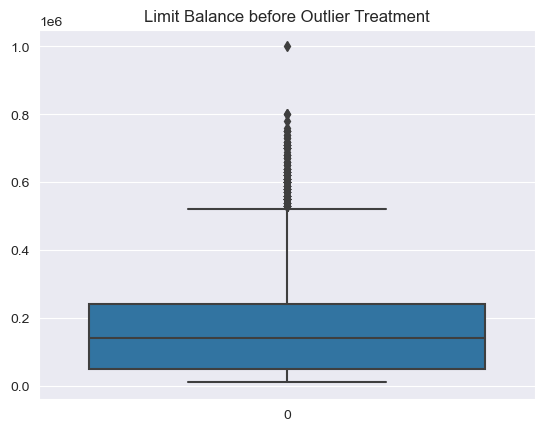

In [26]:
sns.boxplot(train_data['LIMIT_BAL'])
plt.title('Limit Balance before Outlier Treatment')
plt.show()


3.9 Let's check correlation matrix to check multicollinearity between features

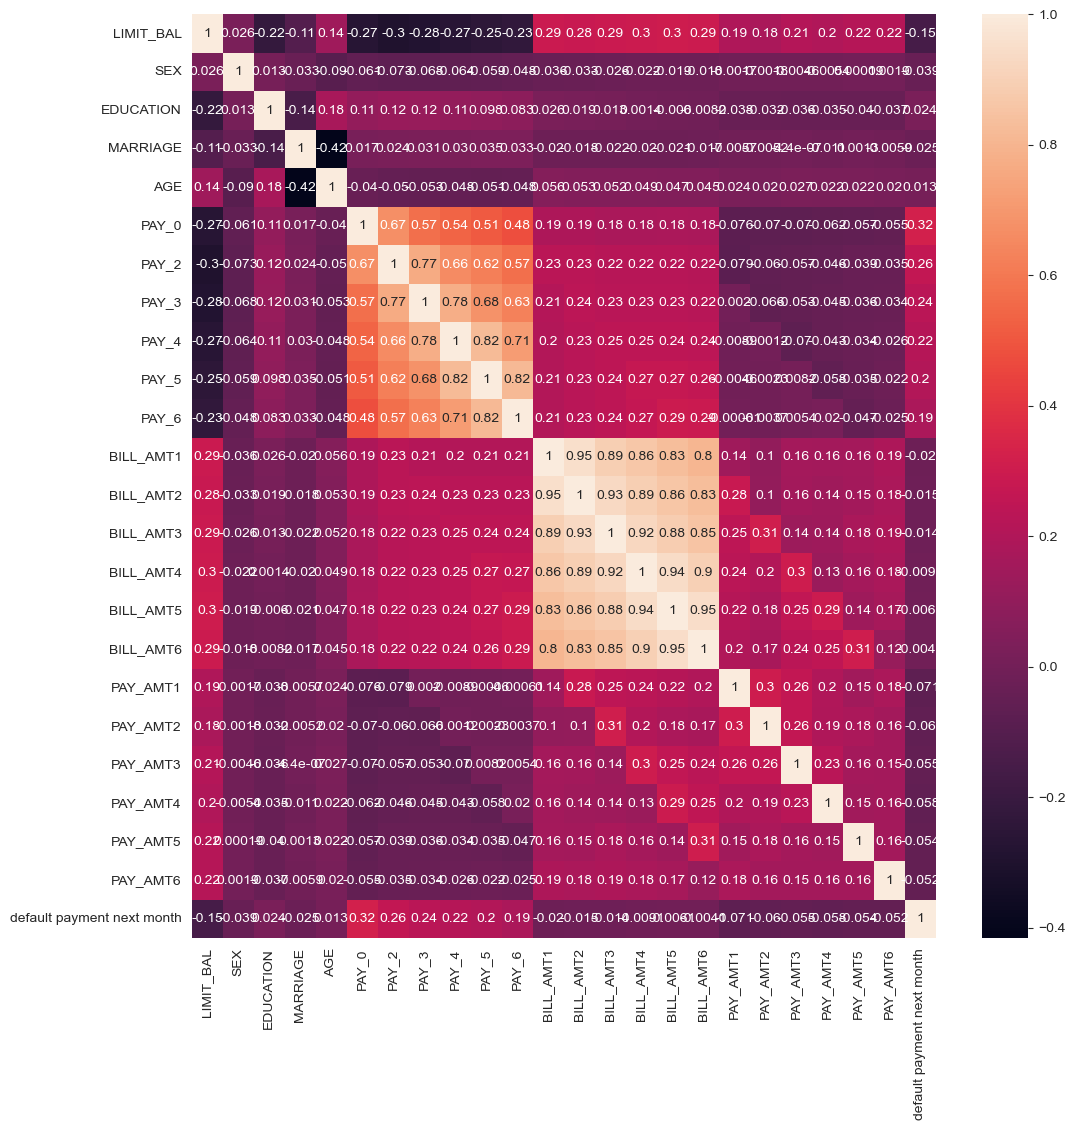

In [27]:
corr_matrix = train_data.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True)
plt.show()

From the above correlation matrix, we can clearly see that PAY_0 to PAY_6, the repayment status of months which are nearby have much higher correlation than others, similarly for amount of bill statement.

3.10 Histogram Plot

[[<AxesSubplot: title={'center': 'LIMIT_BAL'}>
  <AxesSubplot: title={'center': 'SEX'}>
  <AxesSubplot: title={'center': 'EDUCATION'}>
  <AxesSubplot: title={'center': 'MARRIAGE'}>
  <AxesSubplot: title={'center': 'AGE'}>]
 [<AxesSubplot: title={'center': 'PAY_0'}>
  <AxesSubplot: title={'center': 'PAY_2'}>
  <AxesSubplot: title={'center': 'PAY_3'}>
  <AxesSubplot: title={'center': 'PAY_4'}>
  <AxesSubplot: title={'center': 'PAY_5'}>]
 [<AxesSubplot: title={'center': 'PAY_6'}>
  <AxesSubplot: title={'center': 'BILL_AMT1'}>
  <AxesSubplot: title={'center': 'BILL_AMT2'}>
  <AxesSubplot: title={'center': 'BILL_AMT3'}>
  <AxesSubplot: title={'center': 'BILL_AMT4'}>]
 [<AxesSubplot: title={'center': 'BILL_AMT5'}>
  <AxesSubplot: title={'center': 'BILL_AMT6'}>
  <AxesSubplot: title={'center': 'PAY_AMT1'}>
  <AxesSubplot: title={'center': 'PAY_AMT2'}>
  <AxesSubplot: title={'center': 'PAY_AMT3'}>]
 [<AxesSubplot: title={'center': 'PAY_AMT4'}>
  <AxesSubplot: title={'center': 'PAY_AMT5'}>
  <A

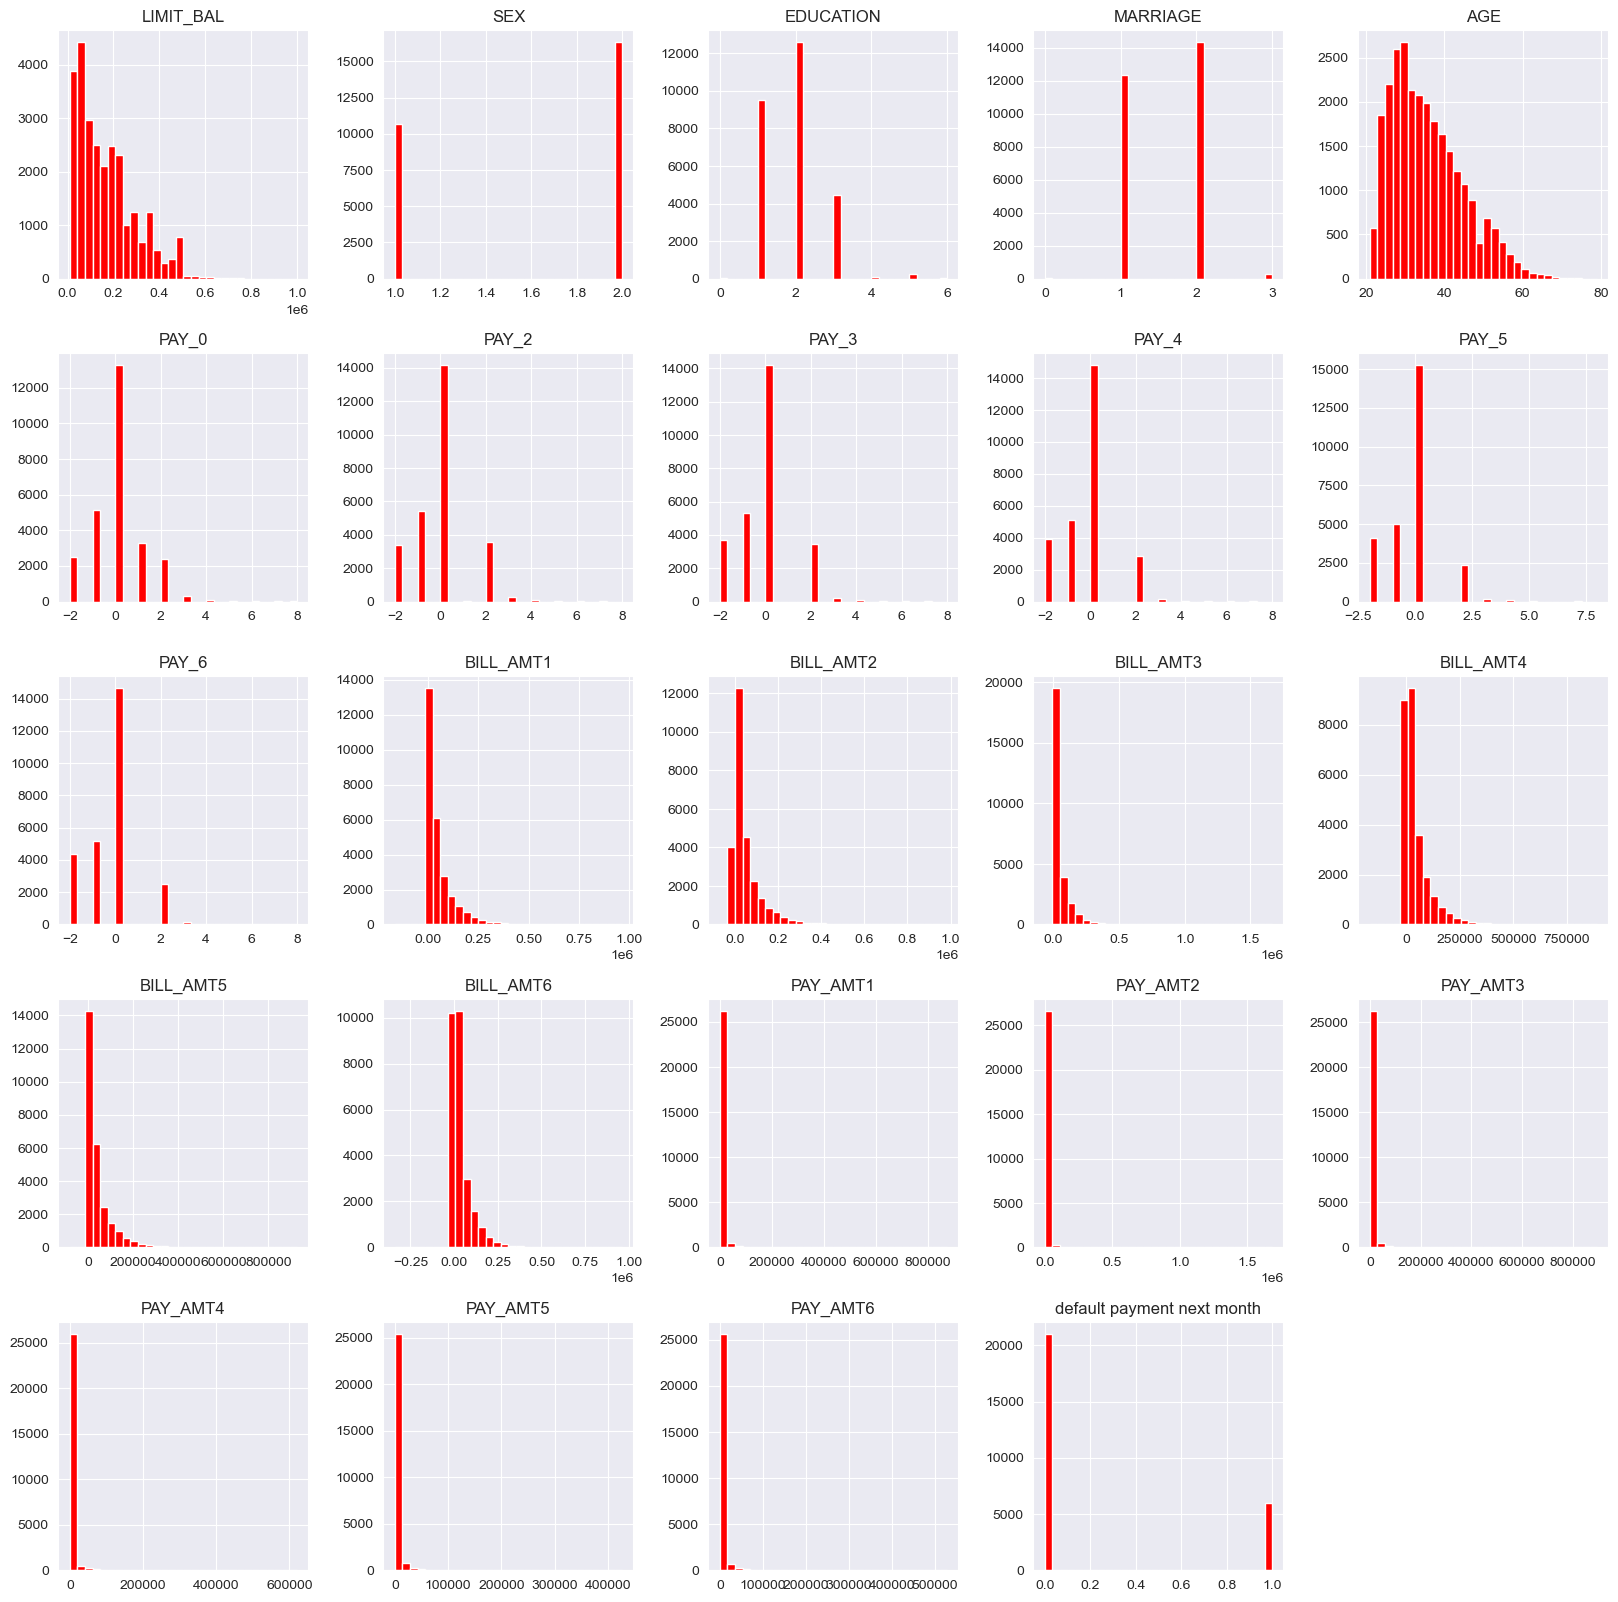

In [28]:
#Perform Data Analysis
print(train_data.hist(bins=30,figsize=(20,20), color='r'))
plt.show()

We can clearly see that the distribution of the data follows power law, which means that general standardization techniques won't be helpful because they assume the data to be gaussian. 

We can apply Median Absolute Deviation(MAD) Scaling which is robust to outliers